## **Redes neurais com PyTorch**

**Classificação**

Base dados de câncer

### **Importando as Bibliotecas e carregando os dados**

In [206]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from skorch import NeuralNetBinaryClassifier

warnings.filterwarnings('ignore')
plt.style.use('dark_background')

df_previsores = pd.read_csv('/Users/diogomonteiro/Datasets/entradas_breast.csv')

df_classe = pd.read_csv('/Users/diogomonteiro/Datasets/saidas_breast.csv')

np.random.seed(123)

torch.manual_seed(123)

df_previsores

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,205.00000,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,111.00000,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,141.00000,0.21130,0.4107,0.2216,206.0000,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,144.00000,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,159.0000,0.05648,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,277.00000,0.35140,152.00000,0.2397,0.07016,...,25.74,39.42,184.60,1821.0,165.00000,0.86810,0.9387,265.0000,0.4087,124.00000


In [207]:
df_classe

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


### **Análise Exploratória e tratamento dos dados**

In [209]:
df_previsores.isnull().sum()

 radius_mean                0
 texture_mean               0
 perimeter_mean             0
 area_mean                  0
 smoothness_mean            0
 compactness_mean           0
 concavity_mean             0
concave_points_mean         0
 symmetry_mean              0
 fractal_dimension_mean     0
 radius_se                  0
 texture_se                 0
 perimeter_se               0
 area_se                    0
 smoothness_se              0
 compactness_se             0
 concavity_se               0
 concave_points_se          0
 symmetry_se                0
 fractal_dimension_se       0
 radius_worst               0
 texture_worst              0
 perimeter_worst            0
 area_worst                 0
 smoothness_worst           0
 compactness_worst          0
 concavity_worst            0
 concave_points_worst       0
 symmetry_worst             0
 fractal_dimension_worst    0
dtype: int64

In [210]:
df_classe.isna().sum()

0    0
dtype: int64

In [211]:
df_classe.value_counts()

0
1    357
0    212
Name: count, dtype: int64

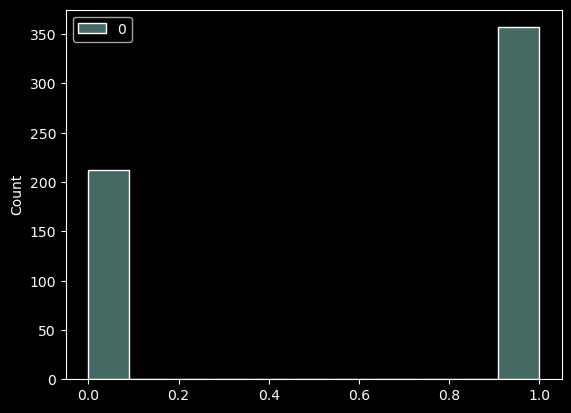

In [212]:
sns.histplot(df_classe);

In [213]:
x_treino,x_teste, y_treino, y_teste  = train_test_split(df_previsores,df_classe, test_size=0.25)

In [214]:
x_teste.shape, y_teste.shape

((143, 30), (143, 1))

In [215]:
x_treino.shape, y_treino.shape

((426, 30), (426, 1))

### **Transformando os dados para tensores**

In [217]:
type(x_teste)

pandas.core.frame.DataFrame

In [218]:
type(np.array(x_treino))

numpy.ndarray

In [219]:
x_treino = torch.tensor(np.array(x_treino), dtype=torch.float)
y_treino = torch.tensor(np.array(y_treino), dtype=torch.float)

In [220]:
type(x_treino)

torch.Tensor

In [221]:
type(y_treino)

torch.Tensor

In [222]:
df = torch.utils.data.TensorDataset(x_treino,y_treino)
type(df)

torch.utils.data.dataset.TensorDataset

In [223]:
df1 = torch.utils.data.DataLoader(df, batch_size=10, shuffle=True)
df1

### **Construção do modelo**

Calculo para saber a estrutura da rede

(30 + 1)/2 = 15,5

Vamos ter uma 30 camadas de entrada, 2 camadas escondida, com 16 neuronios cada um e 1 camada de saída.

In [225]:
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(16,16),
    nn.ReLU(),
    nn.Linear(16,1),
    nn.Sigmoid()
)
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [226]:
criterio = nn.BCELoss()

In [227]:
otimizador = torch.optim.Adam(classificador.parameters(), lr= 0.001, weight_decay=0.0001)

### **Treinando o modelo**

In [345]:
for epoch in range(100):
    Loss = 0.

    for data in df1:
        inputs, labels = data
        #print('--------')
        #print(inputs)
        #print('--------')
        #print(labels)

        otimizador.zero_grad()

        outputs = classificador(inputs)

        loss = criterio(outputs,labels)
        
        loss.backward()
        otimizador.step()
        
        Loss += loss.item()

    print(f'Época {round((epoch+1),3)}: Perda: {round((Loss/len(df1)),3)}')


Época 1: Perda: 0.058
Época 2: Perda: 0.047
Época 3: Perda: 0.042
Época 4: Perda: 0.067
Época 5: Perda: 0.077
Época 6: Perda: 0.04
Época 7: Perda: 0.034
Época 8: Perda: 0.034
Época 9: Perda: 0.044
Época 10: Perda: 0.055
Época 11: Perda: 0.073
Época 12: Perda: 0.037
Época 13: Perda: 0.037
Época 14: Perda: 0.042
Época 15: Perda: 0.039
Época 16: Perda: 0.057
Época 17: Perda: 0.061
Época 18: Perda: 0.035
Época 19: Perda: 0.038
Época 20: Perda: 0.036
Época 21: Perda: 0.045
Época 22: Perda: 0.063
Época 23: Perda: 0.077
Época 24: Perda: 0.039
Época 25: Perda: 0.031
Época 26: Perda: 0.036
Época 27: Perda: 0.06
Época 28: Perda: 0.064
Época 29: Perda: 0.054
Época 30: Perda: 0.076
Época 31: Perda: 0.034
Época 32: Perda: 0.033
Época 33: Perda: 0.045
Época 34: Perda: 0.046
Época 35: Perda: 0.042
Época 36: Perda: 0.059
Época 37: Perda: 0.111
Época 38: Perda: 0.091
Época 39: Perda: 0.054
Época 40: Perda: 0.061
Época 41: Perda: 0.038
Época 42: Perda: 0.049
Época 43: Perda: 0.037
Época 44: Perda: 0.039

### **Visualização dos pesos**

In [347]:
# 30 -> 16 -> 16 -> 1
params = list(classificador.parameters())
params

[Parameter containing:
 tensor([[-2.9141e-01, -5.6799e-01, -3.8054e-01,  1.2031e-01, -1.2694e-02,
           1.3416e-01,  1.1076e-01,  2.7101e-02, -2.0617e-02,  1.5675e-01,
           1.2795e-01,  8.2858e-02, -1.4284e-01,  4.1693e-02,  6.1887e-04,
          -4.9206e-03, -4.0144e-02,  2.4192e-03,  3.5694e-01,  9.1609e-04,
          -1.3495e-01, -6.1043e-01, -2.7327e-01,  1.2424e-01,  8.4364e-01,
           1.5523e-01, -4.0022e-01,  1.1122e-01,  2.7476e-01,  6.6703e-02],
         [ 5.4235e-01,  1.3527e-01,  6.2182e-01,  1.0638e-01, -7.3324e-01,
           4.6269e-02,  5.3901e-02, -8.7322e-02, -2.4635e-01,  9.1526e-02,
           4.3624e-02, -6.4740e-02, -3.1907e-02,  1.3359e-01, -7.2965e-03,
          -4.2663e-02, -6.1417e-02, -1.6561e-02, -3.5159e-01, -1.2914e-02,
           4.6008e-01, -2.5126e-01,  4.4460e-01,  9.2887e-03, -2.0681e-01,
          -2.3968e-01, -2.9566e-01,  2.4877e-02, -1.4493e-01, -1.6276e-01],
         [-5.7356e-02, -1.5463e-01, -3.2050e-01, -1.1485e-01, -2.4086e-05,


In [348]:
# 30 -> 16 -> 16 -> 1
pesos = params[0]
pesos.shape

torch.Size([16, 30])

In [349]:
bias0 = params[1]
bias0.shape

torch.Size([16])

In [350]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [351]:
pesos1 = params[3]
pesos1.shape

torch.Size([16])

### **Avaliação do modelo**

In [353]:
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [354]:
type(x_teste)

torch.Tensor

In [355]:
x_teste = torch.tensor(np.array(x_teste),dtype=torch.float)
type(x_teste)

torch.Tensor

In [356]:
previsoes = classificador.forward(x_teste)
previsoes

tensor([[9.9951e-01],
        [1.0000e+00],
        [1.3227e-02],
        [1.0000e+00],
        [1.0543e-07],
        [6.2287e-01],
        [9.4790e-01],
        [1.0000e+00],
        [9.5572e-01],
        [3.7168e-02],
        [9.9992e-01],
        [1.0000e+00],
        [4.6407e-20],
        [9.9996e-01],
        [9.9997e-01],
        [9.1218e-01],
        [9.9999e-01],
        [1.0000e+00],
        [6.4684e-01],
        [1.0000e+00],
        [2.2235e-12],
        [2.6046e-07],
        [7.8175e-01],
        [1.0000e+00],
        [9.8805e-01],
        [1.7951e-03],
        [9.9997e-01],
        [1.0000e+00],
        [2.8151e-08],
        [1.0000e+00],
        [6.9256e-01],
        [9.9998e-01],
        [9.6270e-01],
        [9.9978e-01],
        [3.1617e-01],
        [1.0000e+00],
        [9.9332e-01],
        [1.0000e+00],
        [1.0000e+00],
        [7.0085e-05],
        [5.1132e-03],
        [9.9699e-01],
        [9.7338e-10],
        [3.8910e-01],
        [3.8444e-09],
        [6

In [357]:
previsoes = np.array(previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [358]:
y_teste

,0
333,1
273,1
201,0
178,1
85,0
...,...
230,0
282,0
535,0
436,1


In [359]:
taxa_acerto = accuracy_score(y_teste,previsoes)
print(f'Acurácia: {round(taxa_acerto,3)}%')

Acurácia: 0.909%
